In [16]:
import networkx as nx
import random
import os
import matplotlib.pyplot as plt
from itertools import combinations
from nxviz import CircosPlot
from collections import defaultdict
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, ResetTool, BoxZoomTool, LassoSelectTool, PanTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral7

In [17]:
os.chdir("/home/daminijain/NetworkX")

In [19]:
G = nx.DiGraph()

file = open("bitcoin.csv","r")
for l in file:
    ls = l.strip().split(",")
    G.add_edge(ls[0], ls[1], weight = float(ls[2]))
file.close()

In [20]:
print("The number of edges in Graph are: {}" .format(len(G.edges())))

The number of edges in Graph are: 24186


In [21]:
print("The number of nodes in Graph are: {}" .format(len(G.nodes())))

The number of nodes in Graph are: 3783


In [22]:
type(G)

networkx.classes.digraph.DiGraph

In [23]:
nx.is_strongly_connected(G)

False

In [25]:
nx.is_weighted(G)

True

/home/daminijain/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/daminijain/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


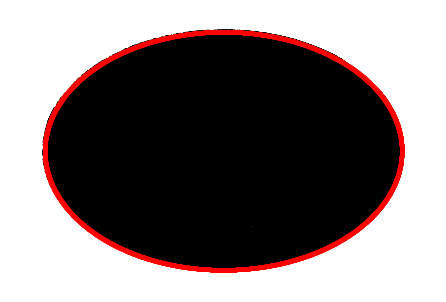

In [33]:
nx.draw_shell(G, node_size = 10)
plt.show()


In [30]:
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    for n in G.nodes():
        if len(list(G.neighbors(n))) == m:
            nodes.add(n)
    return nodes


seven_nbrs = nodes_with_m_nbrs(G, 7)
print(seven_nbrs)

{'751', '1322', '1811', '799', '1039', '804', '710', '1379', '857', '918', '439', '676', '243', '7334', '7410', '518', '1241', '468', '458', '1328', '7596', '7397', '953', '1083', '501', '2244', '513', '637', '661', '610', '1041', '615', '791', '1064', '221', '894', '349', '5679', '920', '504', '704', '586', '325', '354', '2380', '307', '455', '1001', '705', '1038', '1136', '574', '621', '7390', '7560', '853', '890', '883', '732', '677', '464', '678', '969', '955', '7380', '620', '865', '7375', '282', '575', '634', '738', '572'}


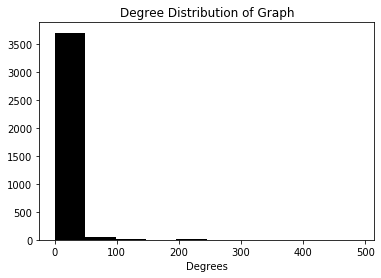

The maximum degree of Graph is: 490


In [32]:
# Compute the degree distribution of entire graph.
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

plt.hist(degrees, color = "black")
plt.xlabel("Degrees")
plt.title("Degree Distribution of Graph")
plt.show()


print("The maximum degree of Graph is: {}" .format(max(degrees)))

In [33]:
#which trader have "unrequited" friendships, that is, they have rated another trader as their favourite at least once, but that other trader has not rated them as their favourite at least once.

len([(n1, n2) for n1, n2 in G.edges() if not G.has_edge(n2, n1)])

4062

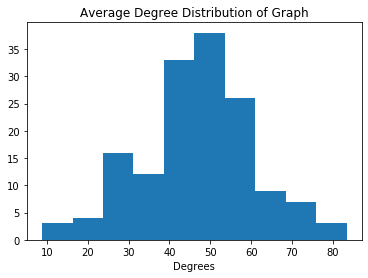

In [34]:
avg_degree = nx.average_degree_connectivity(G)
plt.hist(avg_degree.values())
plt.xlabel("Degrees")
plt.title("Average Degree Distribution of Graph")
plt.show()

In [35]:
deg_cen = nx.degree_centrality(G)
deg_cent = nx.degree_centrality(G)
max_dc = max(list(deg_cent.values()))

In [38]:
def find_nodes_with_highest_deg_cent(G):
    deg_cent = nx.degree_centrality(G)
    max_dc = max(list(deg_cent.values()))
    nodes = set() 
    for k, v in deg_cent.items():
        if v  == max_dc:
            nodes.add(k)
    return nodes

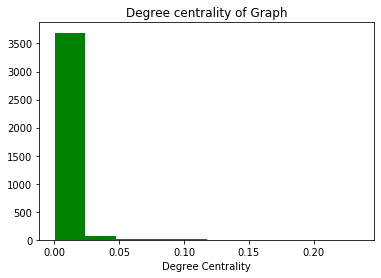

In [39]:
plt.hist(list(deg_cen.values()), color = "green")
plt.title("Degree centrality of Graph")
plt.xlabel("Degree Centrality")
plt.show()

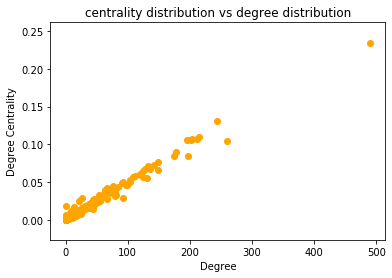

In [40]:
plt.scatter(degrees, list(deg_cen.values()), color = "orange")
plt.title("centrality distribution vs degree distribution")
plt.xlabel("Degree")
plt.ylabel("Degree Centrality")
plt.show()

Maximum vaule of Betweenness Centrality is: 0.149156117120169


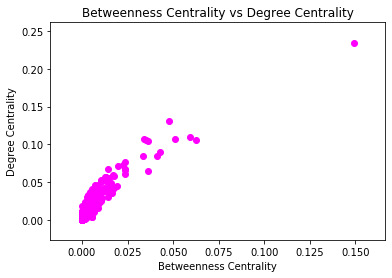

In [41]:
bet_cen = nx.betweenness_centrality(G)
print("Maximum vaule of Betweenness Centrality is: {}" .format(max(bet_cen.values())))


plt.scatter(bet_cen.values(), deg_cen.values(), color = "magenta")
plt.title("Betweenness Centrality vs Degree Centrality")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Degree Centrality")
plt.show()

In [42]:
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    for n1, n2 in combinations(G.neighbors(n),2):
        if not G.has_edge(n1, n2):
            in_open_triangle = True
            break
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0


for n in G.nodes():
    if node_in_open_triangle(G, n):
        num_open_triangles += 1
        
print(num_open_triangles)

1907


/home/daminijain/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/daminijain/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


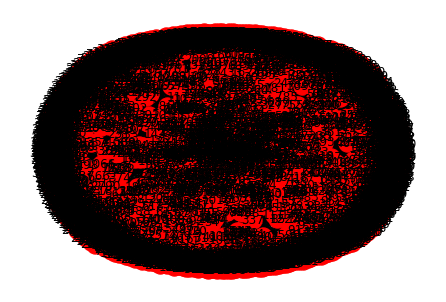

In [46]:
T = nx.depth_first_search.dfs_tree(G)

plt.figure()
nx.draw(T, with_labels=True)
plt.show()

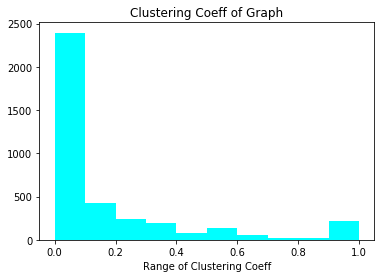

In [81]:
cluster_coeff = nx.clustering(G)

plt.hist(cluster_coeff.values(), color = "cyan")
plt.title("Clustering Coeff of Graph")
plt.xlabel("Range of Clustering Coeff")
plt.show()

In [87]:
nx.density(G)

0.0016904649973936393

In [88]:
#user(s) that have collaborated the most
prolific_collaborators = [n for n, dc in deg_cen.items() if dc == max_dc]

In [43]:
# Initialize the defaultdict: recommended
recommended = defaultdict(int)


for n, d in G.nodes(data = True):
    for n1, n2 in combinations(G.neighbors(n), 2):        
        if not G.has_edge(n1, n2):  
            recommended[(n1, n2)] += 1


# Identify the top 10 pairs of users that should trade with each others
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('1', '3'), ('1', '177'), ('3', '25'), ('3', '26'), ('3', '177'), ('8', '177'), ('11', '33'), ('2', '26'), ('9', '11')]


In [90]:
print(G.edges(data = True))

[('7188', '1', {'weight': 10.0}), ('1', '160', {'weight': 10.0}), ('1', '1028', {'weight': 7.0}), ('1', '309', {'weight': 5.0}), ('1', '11', {'weight': 5.0}), ('1', '594', {'weight': 5.0}), ('1', '1316', {'weight': 5.0}), ('1', '1392', {'weight': 4.0}), ('1', '1583', {'weight': 4.0}), ('1', '888', {'weight': 4.0}), ('1', '637', {'weight': 4.0}), ('1', '1520', {'weight': 4.0}), ('1', '18', {'weight': 4.0}), ('1', '35', {'weight': 4.0}), ('1', '1901', {'weight': 3.0}), ('1', '44', {'weight': 3.0}), ('1', '10', {'weight': 3.0}), ('1', '783', {'weight': 3.0}), ('1', '821', {'weight': 3.0}), ('1', '112', {'weight': 3.0}), ('1', '964', {'weight': 3.0}), ('1', '89', {'weight': 3.0}), ('1', '20', {'weight': 3.0}), ('1', '256', {'weight': 3.0}), ('1', '223', {'weight': 3.0}), ('1', '1881', {'weight': 2.0}), ('1', '351', {'weight': 2.0}), ('1', '196', {'weight': 2.0}), ('1', '416', {'weight': 2.0}), ('1', '1877', {'weight': 2.0}), ('1', '87', {'weight': 2.0}), ('1', '2367', {'weight': 2.0}), ('1

In [44]:
all_weights = []
for (node1, node2, data) in G.edges(data = True):
        all_weights.append(data['weight']) #weights here contains the ratings.

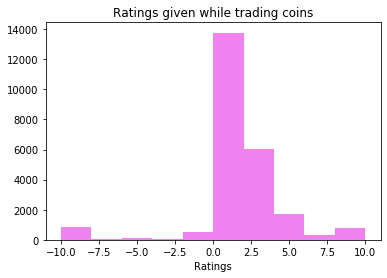

In [92]:
plt.hist(all_weights, color = "violet")
plt.title("Ratings given while trading coins")
plt.xlabel("Ratings")
plt.show()

In [57]:
import pandas as pd
data = pd.read_csv("bitcoin.csv")


#print(data.head(3))

data.rename(columns = {"10":"weight"}, inplace = True)
print(data.head(3))

   7188  1  weight  1407470400
0   430  1      10  1376539200
1  3134  1      10  1369713600
2  3026  1      10  1350014400


In [58]:
# Display graphics in this notebook
output_notebook()

plot = Plot(plot_width = 600, plot_height = 600,
            x_range = Range1d(-1.1, 1.1), y_range = Range1d(-1.1, 1.1), toolbar_location = "left",
           toolbar_sticky = False)
plot.title.text = "Graph Interaction"


tooltips = [('rating', '@weight')]

plot.add_tools(HoverTool(tooltips = tooltips), TapTool(), BoxSelectTool(), ResetTool(), BoxZoomTool(), LassoSelectTool(), PanTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale = 1, center = (0,0))

graph_renderer.node_renderer.glyph = Circle(size = 13, fill_color = Spectral7[0])
graph_renderer.node_renderer.selection_glyph = Circle(size = 13, fill_color = Spectral7[2])
graph_renderer.node_renderer.hover_glyph = Circle(size = 13, fill_color = Spectral7[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color = "#CCCCCC", line_alpha = 0.8, line_width = 5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color = Spectral7[2], line_width = 5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color = Spectral7[1], line_width = 5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graph_networkx.html")
show(plot)



Loading BokehJS ...